In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm                        # api = application programming interface
import statsmodels.tsa.api as smt                   # tsa = time series analysis
import statsmodels.formula.api as smf
from io import StringIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [3]:
sd = pd.read_csv("C:/Users/acer/Downloads/Compressed/ML/Time series/Case study/Case 1/Tractor-Sales.csv")
sd.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


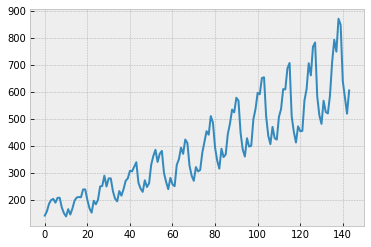

In [5]:
plt.plot(sd['Number of Tractor Sold'])

In [8]:
# simple moving average for level (No trend, No seasonality)

rolmean =  sd['Number of Tractor Sold'].rolling(window=12).mean()
rolstd =  sd['Number of Tractor Sold'].rolling(window=12).std()

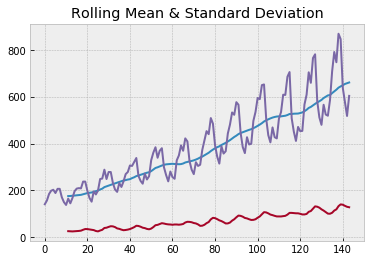

In [18]:
plt.plot(rolmean)
plt.plot(rolstd)
plt.plot(sd['Number of Tractor Sold'])
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [21]:
# winter and holt's winter method

decomposition = sm.tsa.seasonal_decompose(sd['Number of Tractor Sold'], model='multiplicative')

# this doesnt work bcoz you have to convert normal indexing into date indexing for sm.tsa to work

In [22]:
# date indexing

dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sd))

dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [23]:
sd.set_index(dates,inplace=True)

sd.head()

,Month-Year,Number of Tractor Sold
2003-01-01,Jan-03,141
2003-02-01,Feb-03,157
2003-03-01,Mar-03,185
2003-04-01,Apr-03,199
2003-05-01,May-03,203


In [26]:
sd['Number of Tractor Sold'].head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Number of Tractor Sold, dtype: int64

In [27]:
# now with date-index sm.tsa will work



In [28]:
decomposition = sm.tsa.seasonal_decompose(sd['Number of Tractor Sold'], model='multiplicative')

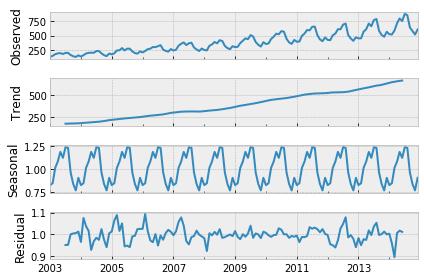

In [29]:
decomposition.plot()
plt.show()

In [31]:
# arima model 






In [33]:
q = d = range(0,2)

p = range(0,4)

for p_id in p:
    for d_id in d:
        for q_id in q:
            mod = sm.tsa.statespace.SARIMAX(sd['Number of Tractor Sold'],
                                            order=(p_id,d_id,q_id),
                                            seasonal_order=(p_id,d_id,q_id,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(p_id,d_id,q_id, results.aic)

0 0 0 2139.953214107524
0 0 1 1655.9668646542966
0 1 0 1125.624692924744
0 1 1 1013.9478315501641
1 0 0 1112.0178536580825
1 0 1 1081.173295775769
1 1 0 1022.3095946497458
1 1 1 1014.2244683528355
2 0 0 991.3932224142784
2 0 1 994.1358562197356
2 1 0 913.6250149108797


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 911.3168701685292
3 0 0 890.3437127150917


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 1 894.5599948520664
3 1 0 804.0390576389002
3 1 1 801.5274870392577


In [34]:
q = d = range(0,3)

p = range(0,5)

for p_id in p:
    for d_id in d:
        for q_id in q:
            mod = sm.tsa.statespace.SARIMAX(sd['Number of Tractor Sold'],
                                            order=(p_id,d_id,q_id),
                                            seasonal_order=(p_id,d_id,q_id,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(p_id,d_id,q_id, results.aic)

0 0 0 2139.953214107524
0 0 1 1655.9668646542966


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 0 2 1335.067737306125
0 1 0 1125.624692924744
0 1 1 1013.9478315501641
0 1 2 907.8799340658898
0 2 0 1213.5897107908268
0 2 1 925.2480826583875
0 2 2 785.2575189968742
1 0 0 1112.0178536580825
1 0 1 1081.173295775769


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 0 2 986.7531477740788
1 1 0 1022.3095946497458
1 1 1 1014.2244683528355


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 1 2 895.818267852781
1 2 0 985.3031473309447
1 2 1 909.2273501898924


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 2 789.5927479186967
2 0 0 991.3932224142784
2 0 1 994.1358562197356


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 2 1000.1930184833096
2 1 0 913.6250149108797


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 1 911.3168701685292
2 1 2 904.4372881261854
2 2 0 845.2926631812489
2 2 1 801.8862360811665


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 2 792.4406291615112
3 0 0 890.3437127150917


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 1 894.5599948520664


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 2 898.7729673560626
3 1 0 804.0390576389002
3 1 1 801.5274870392577


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 1 2 802.7895441953797
3 2 0 719.4016247051907
3 2 1 697.6214883430164


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 2 2 695.1618992967169


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 0 780.9744755971238


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 1 784.9124089048013


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 2 937.6861551131125
4 1 0 688.5737527701665


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 1 1 690.1393145128974


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 1 2 692.645249581534
4 2 0 601.8613247251183
4 2 1 583.1060732217103


C:\Users\acer\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 2 2 584.3008046601597


In [37]:


# final model 

final_model = sm.tsa.statespace.SARIMAX(sd['Number of Tractor Sold'],
                                            order=(3,1,1),
                                            seasonal_order=(3,1,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
final_model.fit()

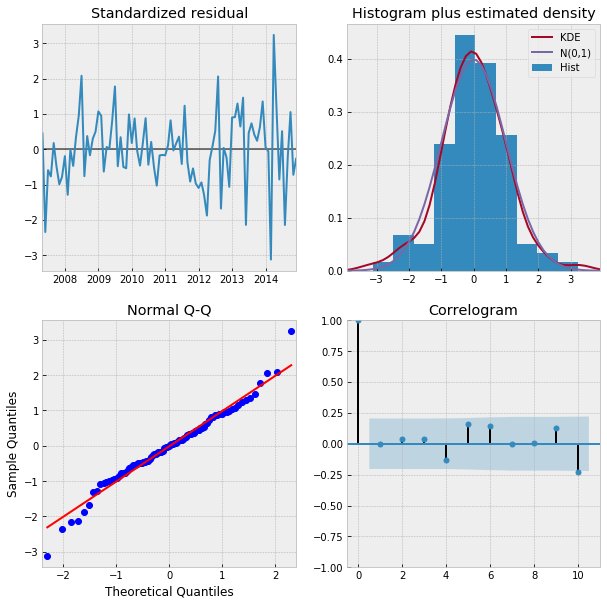

In [38]:
rslt = final_model.fit()
rslt.plot_diagnostics(figsize=(10,10))
plt.show()

In [41]:
pred0 = rslt.get_prediction(start='2003-01-01', dynamic=False)


pred1 = rslt.get_prediction(start='2003-01-01', dynamic=True)     # never use dynamic=True


pred2 = rslt.get_forecast('2016-01-01')
pred2_ci = pred2.conf_int()

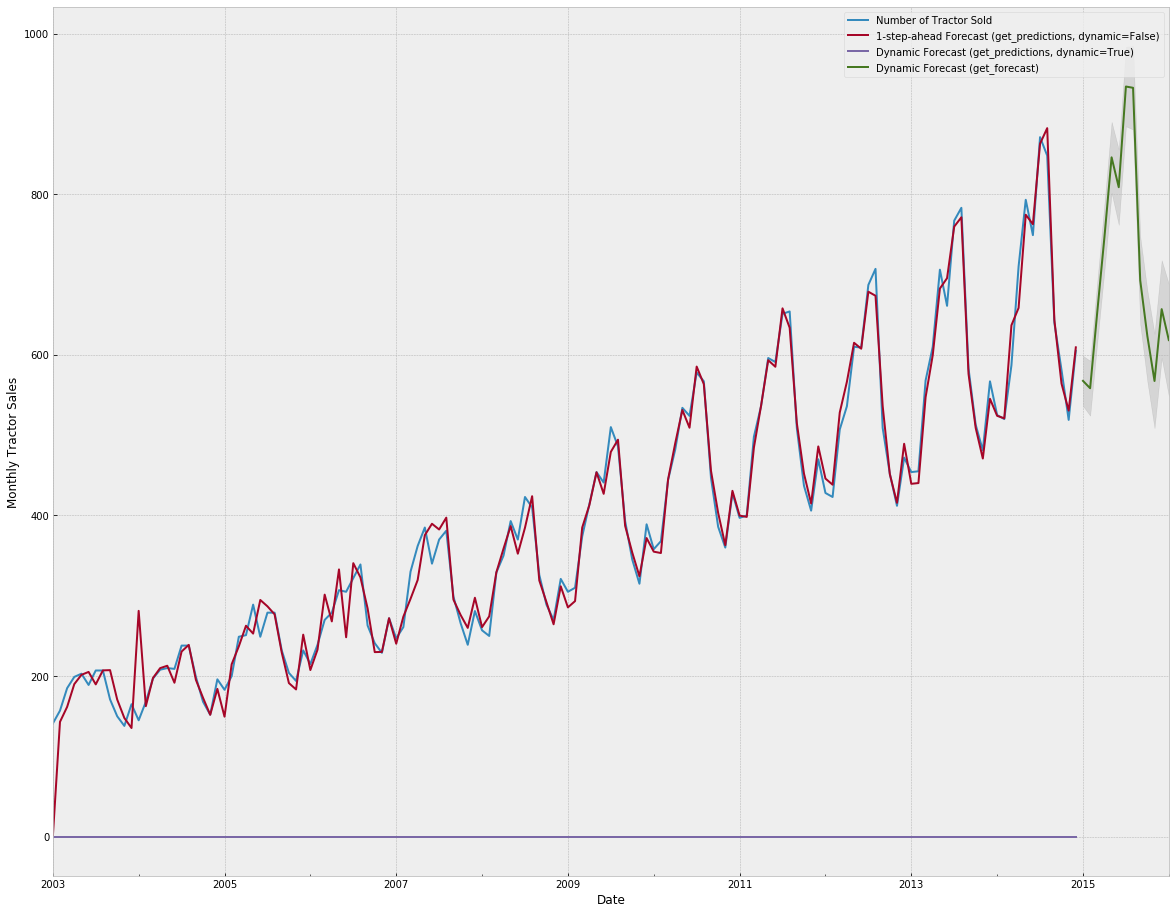

In [42]:
#Plot the predicted values
ax = sd['Number of Tractor Sold'].plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly Tractor Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

In [43]:
# pivot table



In [44]:
import calendar
sd['Month'] = dates.month
sd['Month'] = sd['Month'].apply(lambda x: calendar.month_abbr[x])
sd['Year'] = dates.year
sd

,Month-Year,Number of Tractor Sold,Month,Year
2003-01-01,Jan-03,141,Jan,2003
2003-02-01,Feb-03,157,Feb,2003
2003-03-01,Mar-03,185,Mar,2003
2003-04-01,Apr-03,199,Apr,2003
2003-05-01,May-03,203,May,2003
2003-06-01,Jun-03,189,Jun,2003
2003-07-01,Jul-03,207,Jul,2003
2003-08-01,Aug-03,207,Aug,2003
2003-09-01,Sep-03,171,Sep,2003
2003-10-01,Oct-03,150,Oct,2003
